#### <left>Бронников Максим Андреевич</left>

max120199@gmail.com

#   <center>Домашняя работа №2</center>

**Импортировать csv файл с информацией о ресторанах в DataFrame и вывести первые 10 позиций**

Импортируем библиотеку `Pandas` и используем функцию `read_cvs` для импорта *DataFrame* из *csv* файла

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('kr2/restaurants.csv', sep = ',')
df.head(10)

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0
5,37650,27579,Архангельск,Суши,3.0,0.0,0.0
6,37127,27250,Астрахань,Суши,55.0,5.0,6.0
7,28476,20266,Астрахань,Суши,342.0,13.0,14.0
8,28478,20266,Астрахань,Суши,194.0,1.0,7.0
9,34127,25077,Астрахань,Пицца,136.0,4.0,1.0


**Вывести количество столбцов типа float64**

Выбираем из *DataFrame* только те столбцы, тип которых *float64* функцией `select_dtypes` и узнаем размер 
полученного *DataFrame* методом `shape`. Нас интересует вторая позиция кортежа размеров(количество столбцов).

In [9]:
num_of_floats = df.select_dtypes(include = 'float64').shape[1]
print("Количество столбцов со значением float64:", num_of_floats)

Количество столбцов со значением float64: 3


**Вывести количество наблюдений в DataFrame**

Первая позиция кортежа из метода `shape`- количество строк в *DataFrame*

In [10]:
num_of_observs = df.shape[0]
print("Количество наблюдений в датафрейме:", num_of_observs)

Количество наблюдений в датафрейме: 784


**Вывести количество колонок в DataFrame**

Вторая позиция кортежа метода `shape`- количество столбцов в *DataFrame*

In [11]:
num_of_columns = df.shape[1]
print("Количество колонок в датафрейме:", num_of_columns)

Количество колонок в датафрейме: 7


**Вывести количество уникальных городов в DataFrame**

Атрибут `city_name` - объект класса *Series*, который в свою очередь имеет метод `unique`, возвращающий 
*NumPy Array* с уникальными элементами из *Series*

In [15]:
num_of_cities = df.city_name.unique().shape[0]
print("Количество уникальных городов в датафрейме:",num_of_cities)

Количество уникальных городов в датафрейме: 63


**Вывести количество наблюдений специализации "Рыба"**

Узнаем количество строк в *DataFrame* полученном по индексам, значения элементов по которым в *Series* атрибута 
`specialisation` равны значению "Рыба"

In [6]:
num_of_fish = df.specialisation[df.specialisation == 'Рыба'].shape[0]
print('Количество наблюдений со специализацией "Рыба":', num_of_fish)

Количество наблюдений со специализацией "Рыба": 30


**Вывести количество успешных заказов в DataFrame**

`mean` - метод *Series* возращающий среднее арифметическое по значениям. Нас интересует атрибут `successful_orders`.

In [7]:
mean_value = df.successful_orders.mean()
print("Среднее значение успешных заказов:", round(mean_value))

Среднее значение успешных заказов: 115


**Вывести значение наименее часто встречающегося города в DataFrame**

Метод `value_counts` составляет отсортированный по убыванию значений новый объект *Series*  в котором индексами будут уникальные значения вызывающего его объекта *Series*, а значения - количество их появления в вызывающем объекте. Нас интересует индекс посленего элемента(наименее часто встречающееся значение), который мы получим методом `index` к значению из метода `tail`

In [8]:
city = df.city_name.value_counts().tail(1).index[0]
print("Город с анаименьшим количеством ресторанов:", city)

Город с наименьшим количеством ресторанов: Ханты-Мансийск


**Вывести количество значений в DataFrame с количеством неуспешных заказов более 20**

Нас интересуют те позиции в *DataFrame* значения атрибута `fail_orders` корого больше 20. Ответом будет количество таких позиций.

In [9]:
num_of_morefails = df[df.fail_orders > 20].shape[0]
print("Количество ресторанов с более чем 20 неуспешных заказов:", num_of_morefails)

Количество ресторанов с более чем 20 неуспешных заказов: 10


**Вывести количество значений в DataFrame с количеством заказов неуспешных более 20 и успешных менее 500**

Нас интересуют те позиции *DataFrame* в которых значения атрибута `fail_orders` больше 20 и значения атрибута `successful_orders` меньше 500. Ответом будет количество таких позиций.

In [10]:
num_of_logical_end = df[(df.fail_orders > 20) & (df.successful_orders < 500)].shape[0]
print("Количество ресторанов с более 20 неуспешных и менее 500 успешных заказов:", num_of_logical_end)

Количество ресторанов с более 20 неуспешных и менее 500 успешных заказов: 5


**Вывести среднее количество в DataFrame усешных заказов специлизацией "Выпечка" с округлением до целого**

Найдем среднее значение в *Series* составленной по индексам, значения `specialisation` по которым равны "Выпечка" 

Функция `round`  позволяет округлять вещественные значения до целого

In [11]:
mean_of_success_cookies = df.successful_orders[(df.specialisation == 'Выпечка')].mean()
print('Среднее количество успешных заказов в рестаранах специализации "Выпечка":', round(mean_of_success_cookies))

Среднее количество успешных заказов в рестаранах специализации "Выпечка": 13


**Вывести специализацию из DataFrame с наибольшей долей неудачных значений**

Метод `groupby` позволяет сгруппировать данные из *DataFrame* по значениям столбца(в нашем случае столбца `specialisation`) в объект класса *DataFrameGroupBy* к которому можно применить аггрегирующую функцию и получить объект *DataFrame* c индексами- значениями столбца `specialisation` группируемого *DataFrame*. В данном случае получим сумму по заказам для каждой специализации аггрегатором `sum`.

Операции `/`, `+` применяются поэлементно, что позволяет нам расчитать доли для каждой позиции полученного при группировке *DataFrame*`

In [17]:
newdf = df.groupby('specialisation').sum()
percent_of_fail = \
    (newdf.fail_orders / (newdf.successful_orders + newdf.fail_orders + newdf.reorders)) \
    .sort_values(ascending=False).head(1).index[0]
print("Специализация с наибольшим процентом неудачных заказов:", percent_of_fail)


Специализация с наибольшим процентом неудачных заказов: Вегетарианское меню


**Вывести максимальное количество успешных заказов из DataFrame со специализацией "Бургеры"**

Саггрегируем группу по специализации функцией `max` получающим максимальные значения по каждой из специализаций.
Нас интересует значение успешных заказов по специяализации "Бургеры"

In [13]:
newdf = df.groupby('specialisation').aggregate(max)
num_of_burger_success = newdf.successful_orders['Бургеры']
print('Максимальное количество успешных заказов специализации "Бургеры":', num_of_burger_success)

Максимальное количество успешных заказов специализации "Бургеры": 506.0


**Вывести среднее значение из DataFrame успешных заказов по специализации "Суши" в городе "Белгород"**

Получим среднее значение методом `mean` по атрибуту `successful_orders` по *DataFrame* из тех позиций в которых атрибуты `city_name` принимает значение "Белгород", а `specialisation` "Суши".

In [14]:
mean_of_success_bel_sushi = \
    df.successful_orders[(df.specialisation == 'Суши') & (df.city_name == 'Белгород')].mean()
print('Среднее количество успешных заказов специализации "Суши" в Белгороде:', round(mean_of_success_bel_sushi))


Среднее количество успешных заказов специализации "Суши" в Белгороде: 328


**Импортировать значения оценок из csv файла в качестве DataFrame и присоеденить к исходному DataFrame новую колонку 'model_score' в соответствии по колонкам 'vendor_id' и 'id'**

Импортируем новый файл в *DataFrame* объект функцией `read_csv` и с помощью функции `merge` сделаем объединение по колонкам `vendor_id` исходного *DataFrame* и `id` присоединяемого. Из полученого объединенного *DataFrame* удалим ненужную колонку `id` добавленную при присоеденении.

In [15]:
newdf = pd.read_csv('kr2/restaurant_scores.csv', sep = ',')
df = pd.merge(df, newdf, left_on='vendor_id', right_on = 'id').drop('id', axis = 1)
df.head(5)

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders,model_score
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0,0.421871
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0,0.386503
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0,0.664808
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0,0.838883
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0,0.176469


**Вывести среднее значение model_score с vendor_id равным 27399**

In [16]:
mean_score = df.model_score[df.vendor_id == 27399].mean()
print("Среднее значение model_score при vendor_id 27399:", mean_score)

Среднее значение model_score при vendor_id 27399: nan


**Построить график по заданным значениям**

Импорируем библиотеку `matplotlib.pyplot` для построения графиков. После чего создадим объект класса *Figure* функцией `figure` с параметрами его размера и добавим в него одно окно отрисовки методом `add_subplot`. Метод окна отрисовки `bar` рисует в нем столбчатую диаграмму на основании занесенных данных. Методы `set_title`, `set_ylabel` `set_xlabel` задают заголовок окна, название осей y и x соответственно. Метод `grid` используется для отриовки на графике сеточки для наглядности значений 

<class 'matplotlib.figure.Figure'>


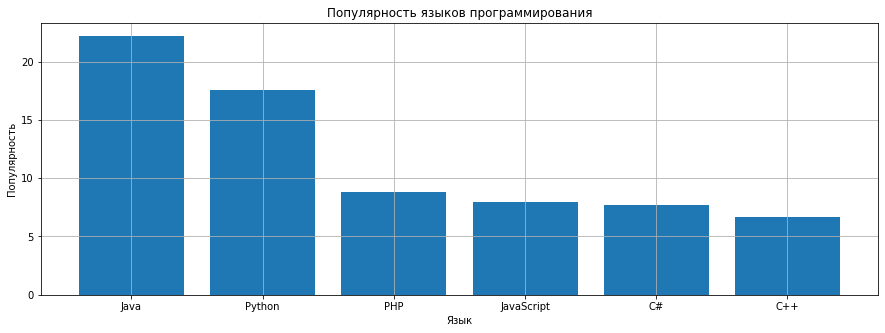

In [23]:
import matplotlib.pyplot as plt
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(111)
ax1.bar(x, popularity)
ax1.set_title('Популярность языков программирования')
ax1.set_ylabel('Популярность')
ax1.set_xlabel('Язык')
ax1.grid()

**Построить график по импортированным в DataFrame данным**

Импортируем библиотеку `seaborn` упрощающей отображение статистических данных. 
Создадим объект *Figure* и в нем 2 окна отрисовки графиков методом `add_subplot`. Первому окну зададим заголовок методом `set_title`. А 2-ому название оси x методом `set_xlabel`. Далее с помощью функции `read_exel` импортируем Exel файл в новый *DataFrame*. Метод окна `set_xlim` позволяет задать диапазон значений по оси x на графике.
Функция `boxplot`библиотеки отрисовывает в указанном окне квадратный график распределения указанного значения(в нашем случае `orders`) из указанного *DataFrame* указанным цветом(в нашем случае 'colwarm'). 
Функция `distplot`рисует гистограмму с линией переданного в нее *Series*

Text(0.5, 0, 'Заказы')

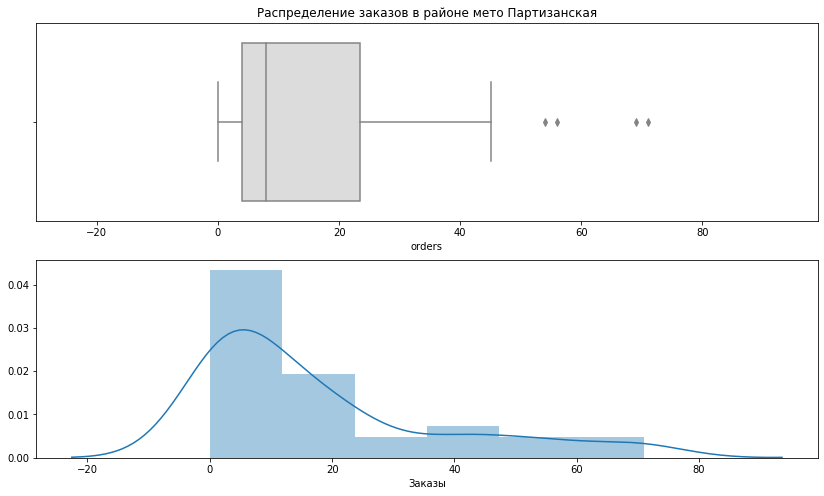

In [18]:
import seaborn as sns
figur = plt.figure(figsize=(14,8))
ax1 = figur.add_subplot(211)
ax1.set_title('Распределение заказов в районе мето Партизанская')
ax2 = figur.add_subplot(212)
partizan = pd.read_excel('kr2/partizan.xlsx')
ax1.set_xlim(-30, 99)
sns.boxplot(x = 'orders', data = partizan, palette = 'coolwarm', \
           ax = ax1)
sns.distplot(partizan.orders, ax = ax2)
ax2.set_xlabel('Заказы')
#sns_plot = sns.pairplot()

###### <center>Сделано Бронниковым Максимом</center>
###### <center>13.10.2019</center>